# Profile
In this notebook, we will perform an exploratory analysis of our wrangled dataset. 

## Imports

In [1]:
import os
from itertools import combinations

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.api.types import is_numeric_dtype
from seaborn import heatmap

## Constants

In [2]:
PROCESSED_DATA_PATH = "../data/processed"

# 1. Pre-processing

## 1.1 Load data

In [3]:
df = pd.read_csv(os.path.join(PROCESSED_DATA_PATH, "wrangled_data.csv"))
print(f"{df.shape = }")
df.head()

df.shape = (6865, 33)


,country,year,number_of_days_min_temp_most_0_fahreheit,number_of_days_min_temp_at_most_32_fahrenheit,number_of_days_max_temp_at_most_32_fahrenheit,number_of_days_max_temp_at_most_70_fahrenheit,number_of_days_max_temp_at_least_90_fahrenheit,absolute_min_temp,max_daily_precipitation,absolute_max_temp,...,exports_percent_of_gdp,gdp_per_capita_yearly_growth,imports_percent_of_gdp,storm_affected_annual_number,population_total,cc_somw_t_per,flood_deaths_annual_number,storm_deaths_annual_number,tsunami_deaths_annual_number,extreme_temperature_affected_annual_number
0,Algeria,1950,0.0,6.333333,0.0,267.000000,100.666667,-1.200000,25.45,41.933333,...,37.252747,0.432,63.891209,0.0,8870000.0,NaN,0.0,0.0,0.0,0.0
1,Algeria,1951,0.0,3.666667,0.0,265.666667,104.000000,-0.733333,21.00,40.833333,...,37.427473,−1.3,64.212088,0.0,9020000.0,NaN,0.0,0.0,0.0,0.0
2,Algeria,1952,0.0,8.500000,0.0,254.500000,98.000000,-1.000000,8.00,44.950000,...,37.602198,2.15,64.532967,0.0,9190000.0,NaN,0.0,0.0,0.0,0.0
3,Algeria,1953,0.0,8.333333,0.0,262.666667,92.666667,-2.800000,27.55,40.666667,...,37.776923,−0.517,64.853846,0.0,9360000.0,NaN,0.0,0.0,0.0,0.0
4,Algeria,1954,0.0,4.500000,0.0,247.750000,71.500000,-1.900000,22.00,41.725000,...,37.951648,4.99,65.174725,0.0,9560000.0,NaN,0.0,0.0,0.0,0.0


## 1.2 Show data types, number of unique distinct and ranges

In [4]:
descriptions = []
for col in df.columns.values:
    series = df[col]
    desc = {
        "variable": col,
        "type": df[col].dtype,
        "ndv": df[col].nunique(),
        "mode": list(df[col].mode()),
        "min": df[col].min() if is_numeric_dtype(df[col]) else "-",
        "max": df[col].max() if is_numeric_dtype(df[col]) else "-",
    }
    descriptions.append(desc)
descriptions = pd.DataFrame(descriptions)
descriptions.sort_values(by="type")

,variable,type,ndv,mode,min,max
1,year,int64,73,"[1958, 1978, 1979]",1950,2022
32,extreme_temperature_affected_annual_number,float64,111,[0.0],0.0,77000000.0
27,population_total,float64,2842,[10300000.0],7430.0,1450000000.0
26,storm_affected_annual_number,float64,399,[0.0],0.0,107000000.0
25,imports_percent_of_gdp,float64,3709,[28.5],2.13,175.0
30,storm_deaths_annual_number,float64,176,[0.0],0.0,6080.0
23,exports_percent_of_gdp,float64,3721,[19.0],1.32,205.0
22,cc_vser_t_per,float64,116,"[34.3, 36.5, 40.4, 43.3, 43.4, 46.7, 52.2, 52....",8.5,86.9
21,gdppercapita_us_inflation_adjusted,float64,4228,[20000.0],164.0,129000.0
20,flood_affected_annual_number,float64,549,[0.0],0.0,243000000.0


`inflation_annual_percent` and `gdp_per_capita_yearly_growth` should be of numeric type, but are shown as object. We will try to convert them to float.

## 1.3 Convert data types

In [5]:
try:
    df["inflation_annual_percent"].astype(float)
    df["gdp_per_capita_yearly_growth"].astype(float)
except Exception as e:
    print(e)

could not convert string to float: '−4.61'


Due to the wrong '-' sign in the data, the conversion does not work. We will replace it and transform the variables to float.

In [6]:
df["inflation_annual_percent"] = (
    df["inflation_annual_percent"]
    .copy()
    .apply(lambda x: str(x).replace("−", "-"))
    .astype(float)
)
df["gdp_per_capita_yearly_growth"] = (
    df["gdp_per_capita_yearly_growth"]
    .copy()
    .apply(lambda x: str(x).replace("−", "-"))
    .astype(float)
)

## 1.4 Define semantic variable types 

In [7]:
meta_variables = ["year", "country"]
environmental_variables = [
    "extreme_temperature_affected_annual_number",
    "storm_affected_annual_number",
    "storm_deaths_annual_number",
    "cc_vser_t_per",
    "flood_affected_annual_number",
    "extreme_temperature_deaths_annual_number",
    "sulfur_emissions_per_person_kg",
    "cc_vser_somw_t_per",
    "tsunami_deaths_annual_number",
    "co2_emissions_tonnes_per_person",
    "tsunami_affected_annual_number",
    "cc_somw_t_per",
    "flood_deaths_annual_number",
]
economical_variables = [
    "population_total",
    "imports_percent_of_gdp",
    "exports_percent_of_gdp",
    "gdppercapita_us_inflation_adjusted",
    "gdp_per_capita_yearly_growth",
    "inflation_annual_percent",
]
meteorological_variables = [
    "average_annual_min_temp",
    "average_annual_max_temp",
    "average_annual_temp",
    "total_precipitation",
    "absolute_max_temp",
    "max_daily_precipitation",
    "absolute_min_temp",
    "number_of_days_max_temp_at_least_90_fahrenheit",
    "number_of_days_max_temp_at_most_70_fahrenheit",
    "number_of_days_max_temp_at_most_32_fahrenheit",
    "number_of_days_min_temp_at_most_32_fahrenheit",
    "number_of_days_min_temp_most_0_fahreheit",
]

assert len(
    meta_variables
    + environmental_variables
    + economical_variables
    + meteorological_variables
) == len(df.columns.values)

# 2. Distributions

## 2.1 Meta variables

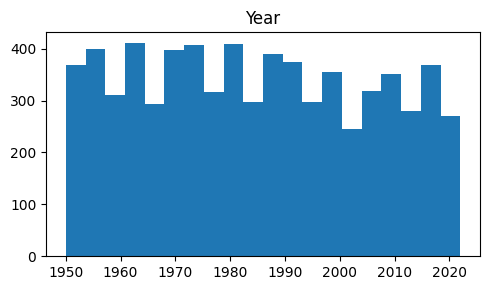

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(df["year"], bins="auto")
ax.set_title("Year")
plt.tight_layout()
plt.show()

## 2.2 Environmental variables

len(environmental_variables) = 13


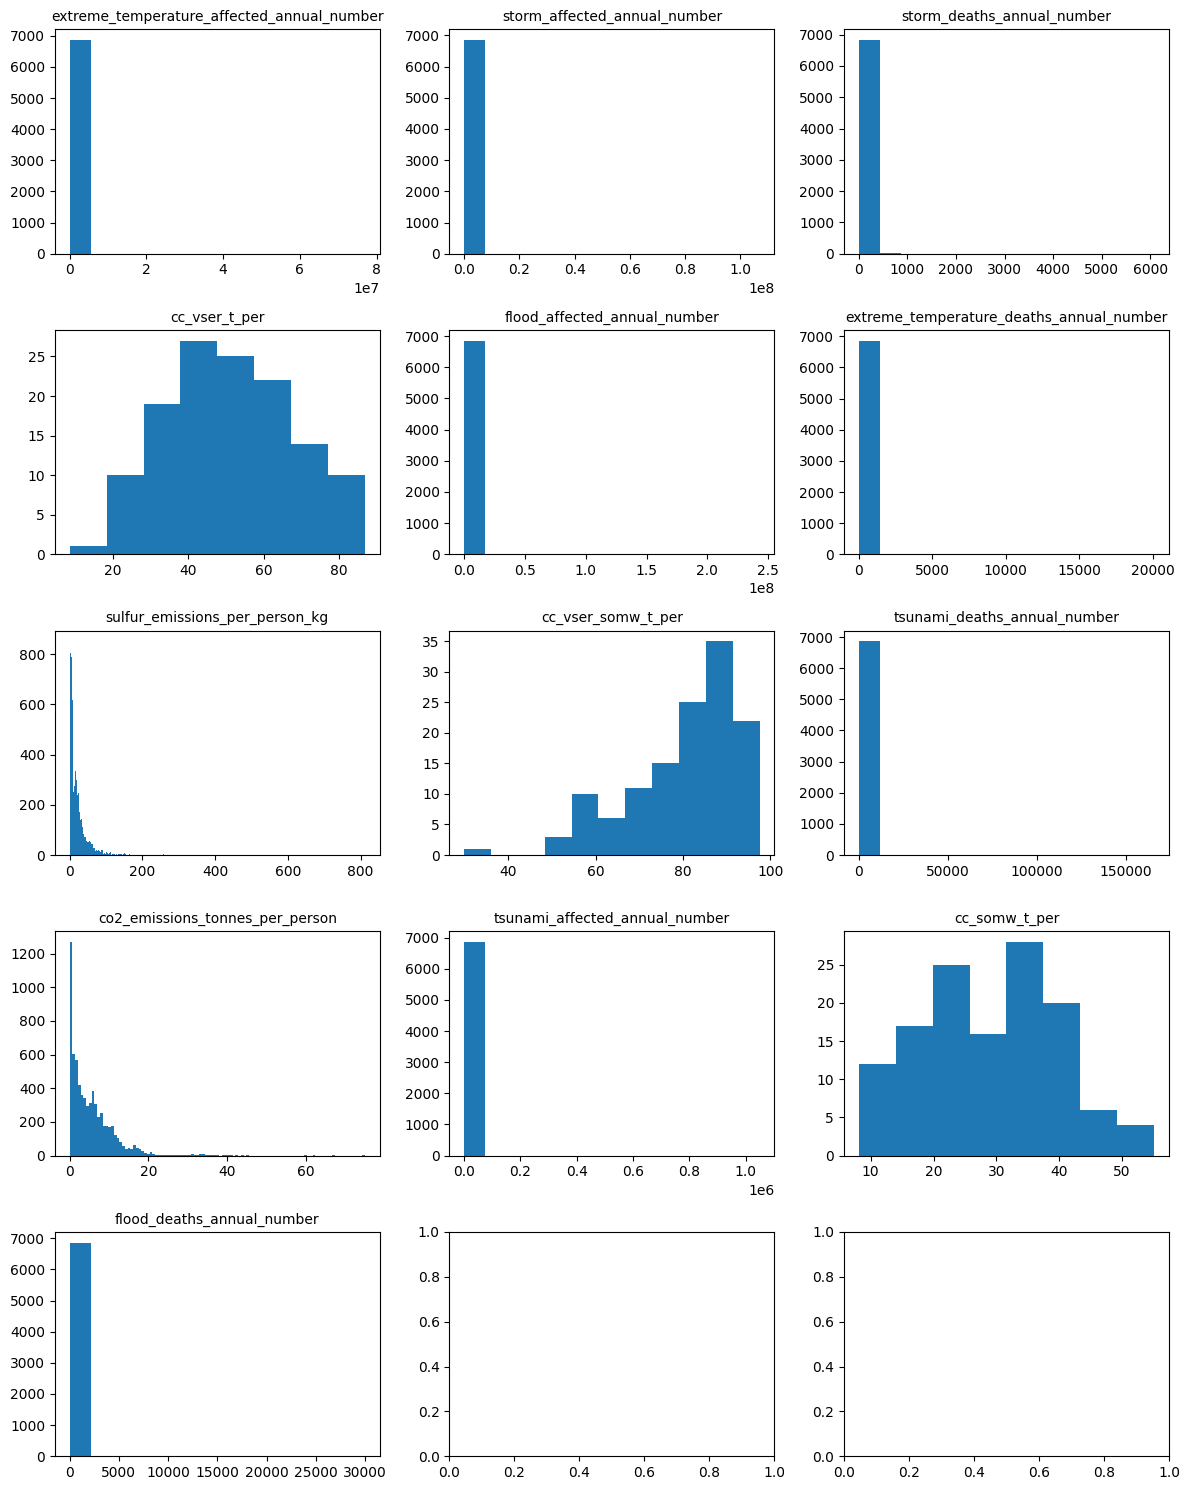

In [9]:
print(f"{len(environmental_variables) = }")


def plot_histograms(variables, rows, cols, df=df):
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axs = axs.flatten()
    for idx, var in enumerate(variables):
        axs[idx].hist(df[var], bins="auto")
        axs[idx].set_title(var, fontdict={"fontsize": 10})

    plt.tight_layout()
    plt.show()


plot_histograms(environmental_variables, 5, 3)

## 2.3 Economical variables

len(economical_variables) = 6


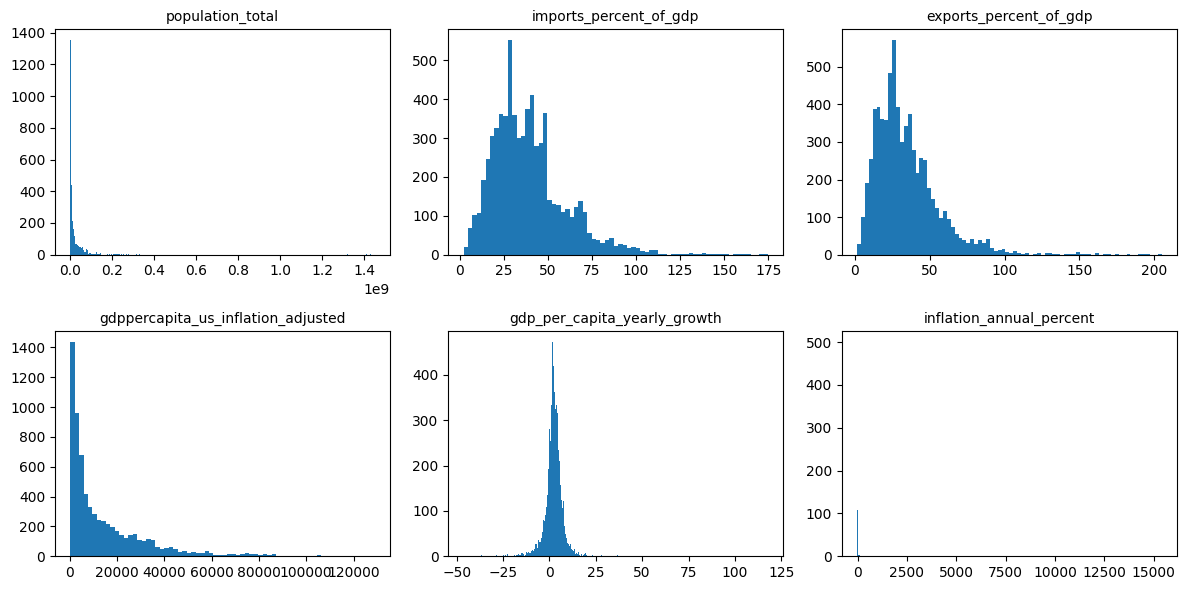

In [10]:
print(f"{len(economical_variables) = }")

plot_histograms(economical_variables, 2, 3)

## 2.4 Meteorological variables

len(meteorological_variables) = 12


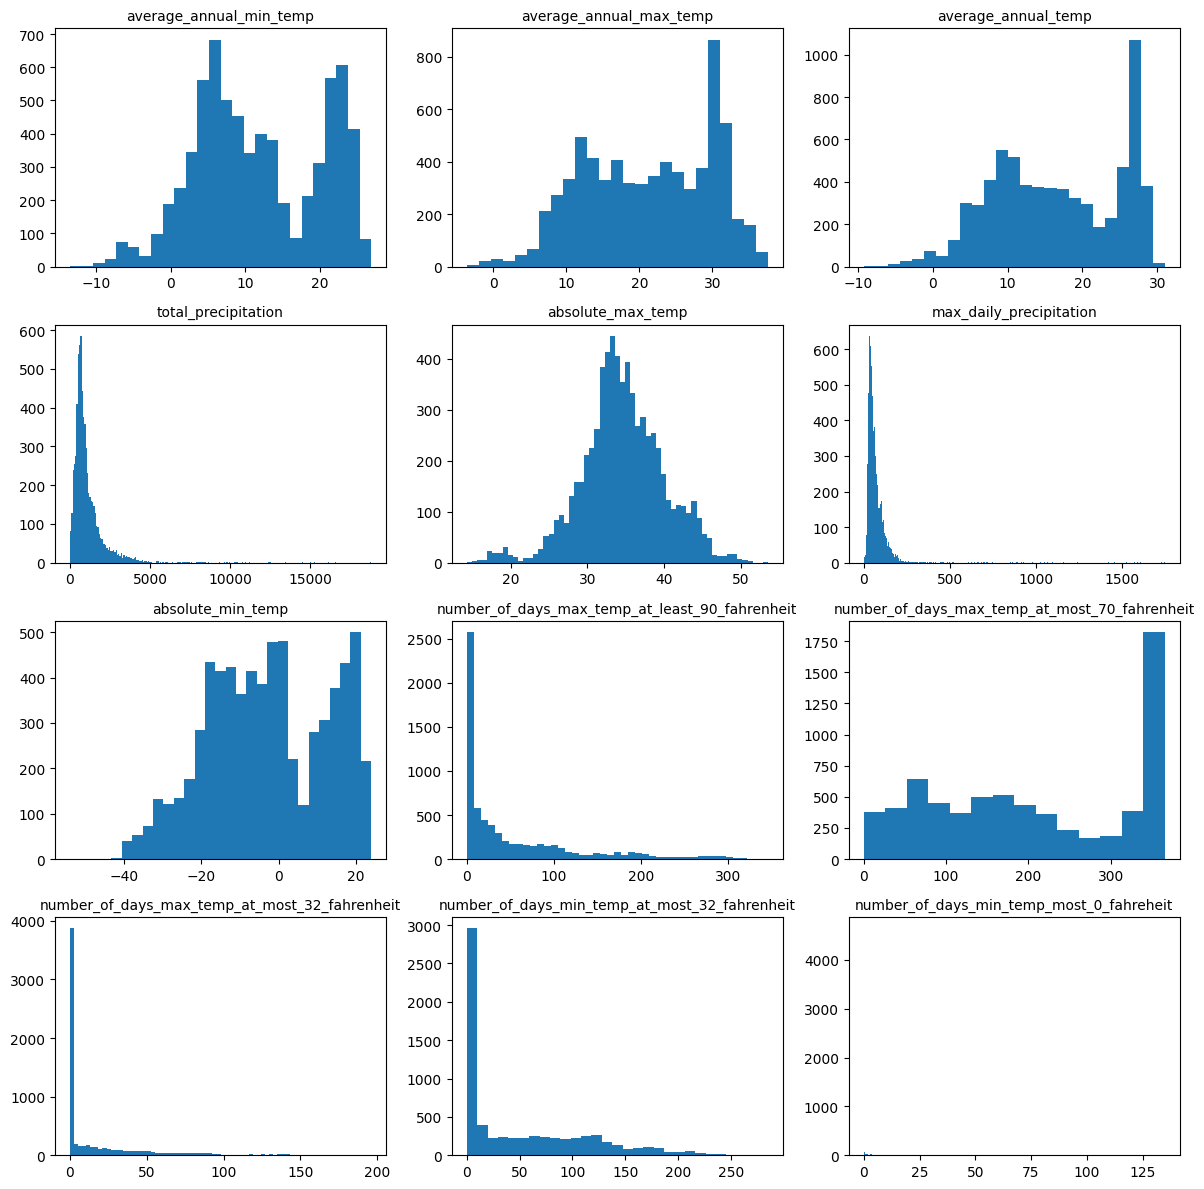

In [11]:
print(f"{len(meteorological_variables) = }")

plot_histograms(meteorological_variables, 4, 3)

# 3. Changes over time

In [12]:
eu_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
]
top_10_gdp_eu_countries = [
    "Austria",
    "Belgium",
    "Denmark",
    "France",
    "Finland",
    "Germany",
    "Ireland",
    "Luxembourg",
    "Netherlands",
    "Sweden",
]

df_eu_top_10 = df[df["country"].isin(top_10_gdp_eu_countries)]
df_eu = df[df["country"].isin(eu_countries)]

## 3.1 Enviromental variables

### 3.1.1 CO2 emissions per person

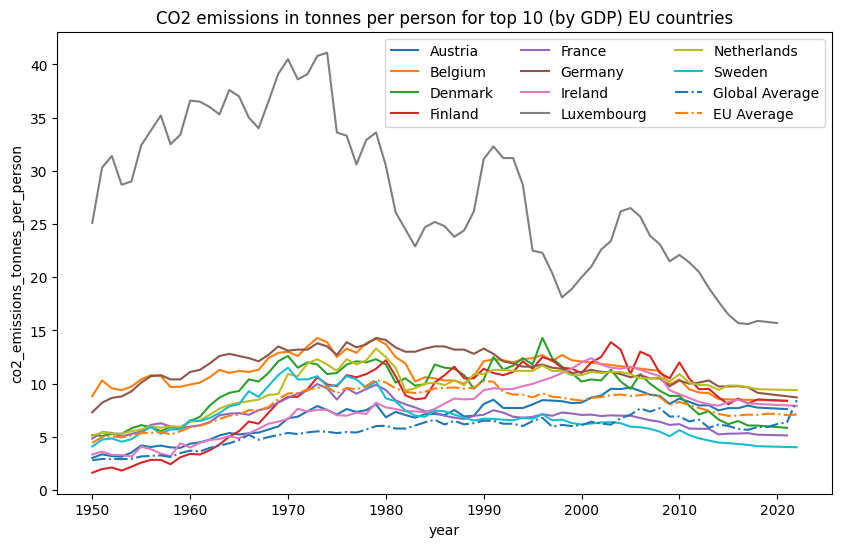

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="year", y="co2_emissions_tonnes_per_person", hue="country", data=df_eu_top_10
)

global_avg_co2 = df.groupby("year")["co2_emissions_tonnes_per_person"].agg("mean")
eu_avg_co2 = df_eu.groupby("year")["co2_emissions_tonnes_per_person"].agg("mean")

ax.plot(
    global_avg_co2.index, global_avg_co2, label="Global Average", linestyle="dashdot"
)
ax.plot(eu_avg_co2.index, eu_avg_co2, label="EU Average", linestyle="dashdot")


ax.set_title("CO2 emissions in tonnes per person for top 10 (by GDP) EU countries")
plt.legend(loc="best", ncol=3)
plt.show()

In [14]:
environmental_variables

['extreme_temperature_affected_annual_number',
 'storm_affected_annual_number',
 'storm_deaths_annual_number',
 'cc_vser_t_per',
 'flood_affected_annual_number',
 'extreme_temperature_deaths_annual_number',
 'sulfur_emissions_per_person_kg',
 'cc_vser_somw_t_per',
 'tsunami_deaths_annual_number',
 'co2_emissions_tonnes_per_person',
 'tsunami_affected_annual_number',
 'cc_somw_t_per',
 'flood_deaths_annual_number']

## 3.2 Economical variables
### 3.2.1 GDP per capita

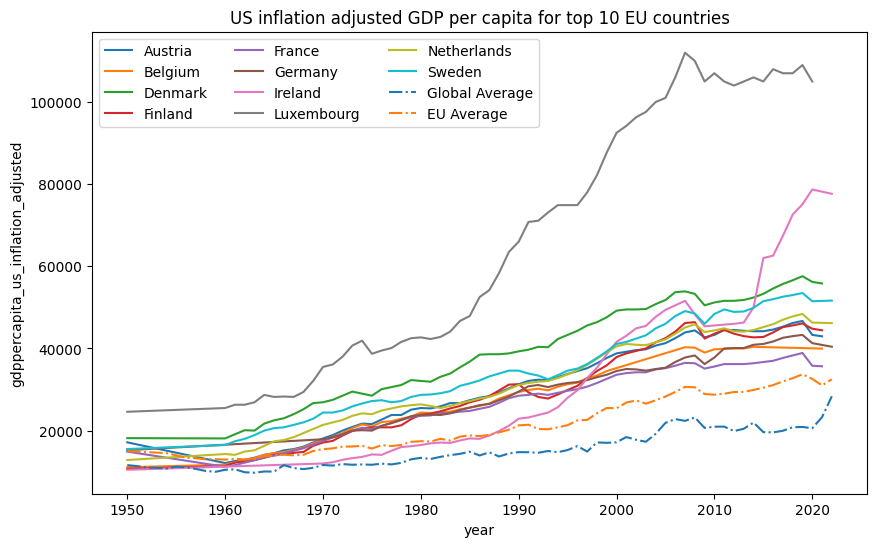

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="year", y="gdppercapita_us_inflation_adjusted", hue="country", data=df_eu_top_10
)

global_avg_gdp = df.groupby("year")["gdppercapita_us_inflation_adjusted"].agg("mean")
eu_avg_gdp = df_eu.groupby("year")["gdppercapita_us_inflation_adjusted"].agg("mean")

ax.plot(
    global_avg_gdp.index, global_avg_gdp, label="Global Average", linestyle="dashdot"
)
ax.plot(eu_avg_gdp.index, eu_avg_gdp, label="EU Average", linestyle="dashdot")

ax.set_title("US inflation adjusted GDP per capita for top 10 EU countries")
plt.legend(loc="best", ncol=3)
plt.show()

## 3.3 Meteorological variables

In [16]:
meteorological_variables

['average_annual_min_temp',
 'average_annual_max_temp',
 'average_annual_temp',
 'total_precipitation',
 'absolute_max_temp',
 'max_daily_precipitation',
 'absolute_min_temp',
 'number_of_days_max_temp_at_least_90_fahrenheit',
 'number_of_days_max_temp_at_most_70_fahrenheit',
 'number_of_days_max_temp_at_most_32_fahrenheit',
 'number_of_days_min_temp_at_most_32_fahrenheit',
 'number_of_days_min_temp_most_0_fahreheit']

### 3.3.1 Average annual temperature

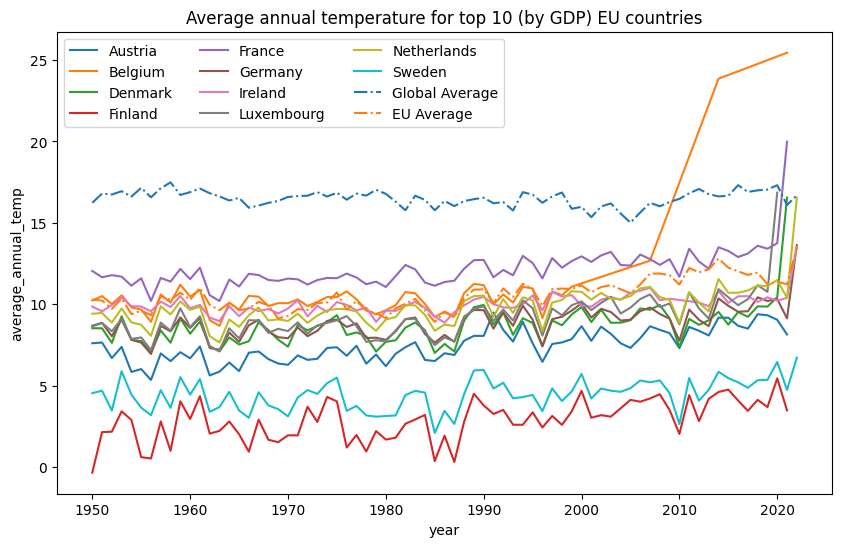

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="year", y="average_annual_temp", hue="country", data=df_eu_top_10)

global_avg_avg_temp = df.groupby("year")["average_annual_temp"].agg("mean")
eu_avg_avg_temp = df_eu.groupby("year")["average_annual_temp"].agg("mean")

ax.plot(
    global_avg_avg_temp.index,
    global_avg_avg_temp,
    label="Global Average",
    linestyle="dashdot",
)
ax.plot(eu_avg_avg_temp.index, eu_avg_avg_temp, label="EU Average", linestyle="dashdot")


ax.set_title("Average annual temperature for top 10 (by GDP) EU countries")
plt.legend(loc="best", ncol=3)
plt.show()

In [18]:
df.loc[
    (df["country"] == "Belgium") & (df["year"] > 1990),
    ["average_annual_temp", "average_annual_min_temp", "average_annual_max_temp"],
]

,average_annual_temp,average_annual_min_temp,average_annual_max_temp
607,10.0000,6.1500,13.8500
608,10.6000,6.8600,14.3400
609,10.1000,6.4400,13.7700
610,11.0700,7.3900,14.7500
611,10.9700,7.1900,14.7600
612,9.1500,5.5100,12.8000
613,10.7800,6.9200,14.6400
614,10.5600,7.0000,14.1200
615,11.0800,7.4800,14.6900
616,12.6766,8.8932,16.4692


### 3.3.2 Absolute minumum temperature

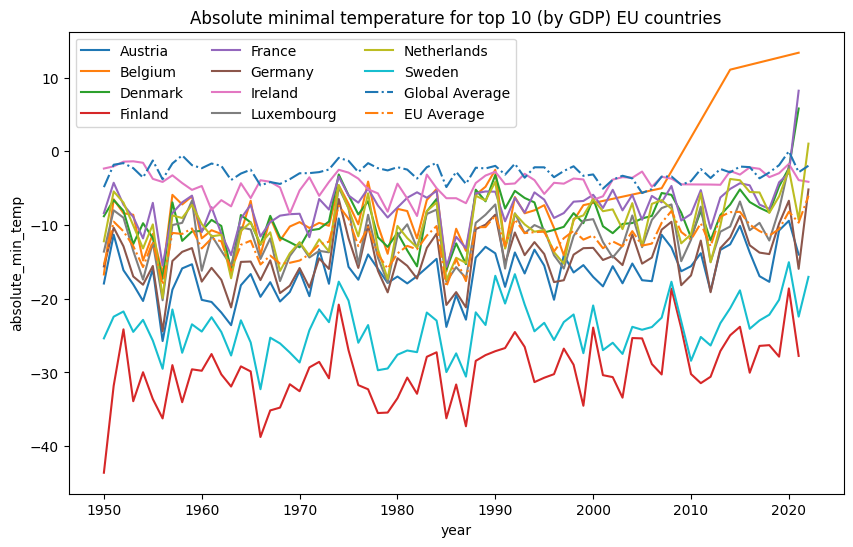

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="year", y="absolute_min_temp", hue="country", data=df_eu_top_10)

global_avg_abs_min_temp = df.groupby("year")["absolute_min_temp"].agg("mean")
eu_avg_avg_abs_min_temp = df_eu.groupby("year")["absolute_min_temp"].agg("mean")

ax.plot(
    global_avg_abs_min_temp.index,
    global_avg_abs_min_temp,
    label="Global Average",
    linestyle="dashdot",
)
ax.plot(
    eu_avg_avg_abs_min_temp.index,
    eu_avg_avg_abs_min_temp,
    label="EU Average",
    linestyle="dashdot",
)


ax.set_title("Absolute minimal temperature for top 10 (by GDP) EU countries")
plt.legend(loc="best", ncol=3)
plt.show()

### 3.3.3 Absolute maximum temperature

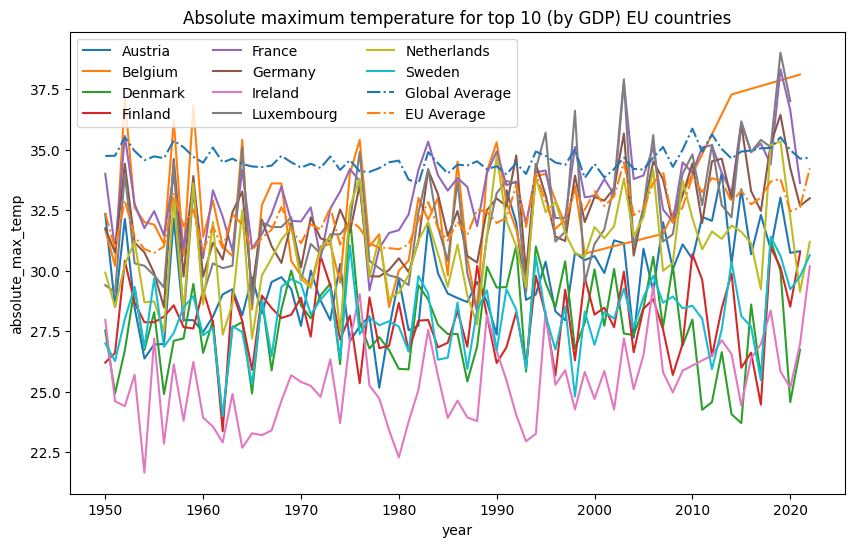

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="year", y="absolute_max_temp", hue="country", data=df_eu_top_10)

global_avg_abs_max_temp = df.groupby("year")["absolute_max_temp"].agg("mean")
eu_avg_avg_abs_max_temp = df_eu.groupby("year")["absolute_max_temp"].agg("mean")

ax.plot(
    global_avg_abs_max_temp.index,
    global_avg_abs_max_temp,
    label="Global Average",
    linestyle="dashdot",
)
ax.plot(
    eu_avg_avg_abs_max_temp.index,
    eu_avg_avg_abs_max_temp,
    label="EU Average",
    linestyle="dashdot",
)


ax.set_title("Absolute maximum temperature for top 10 (by GDP) EU countries")
plt.legend(loc="best", ncol=3)
plt.show()

# 4. Correlation

## 4.1 All variables

/var/folders/s4/dkp8x8kd26n0fj9yhhg4dbdr0000gp/T/ipykernel_99780/4244553404.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="BrBG")


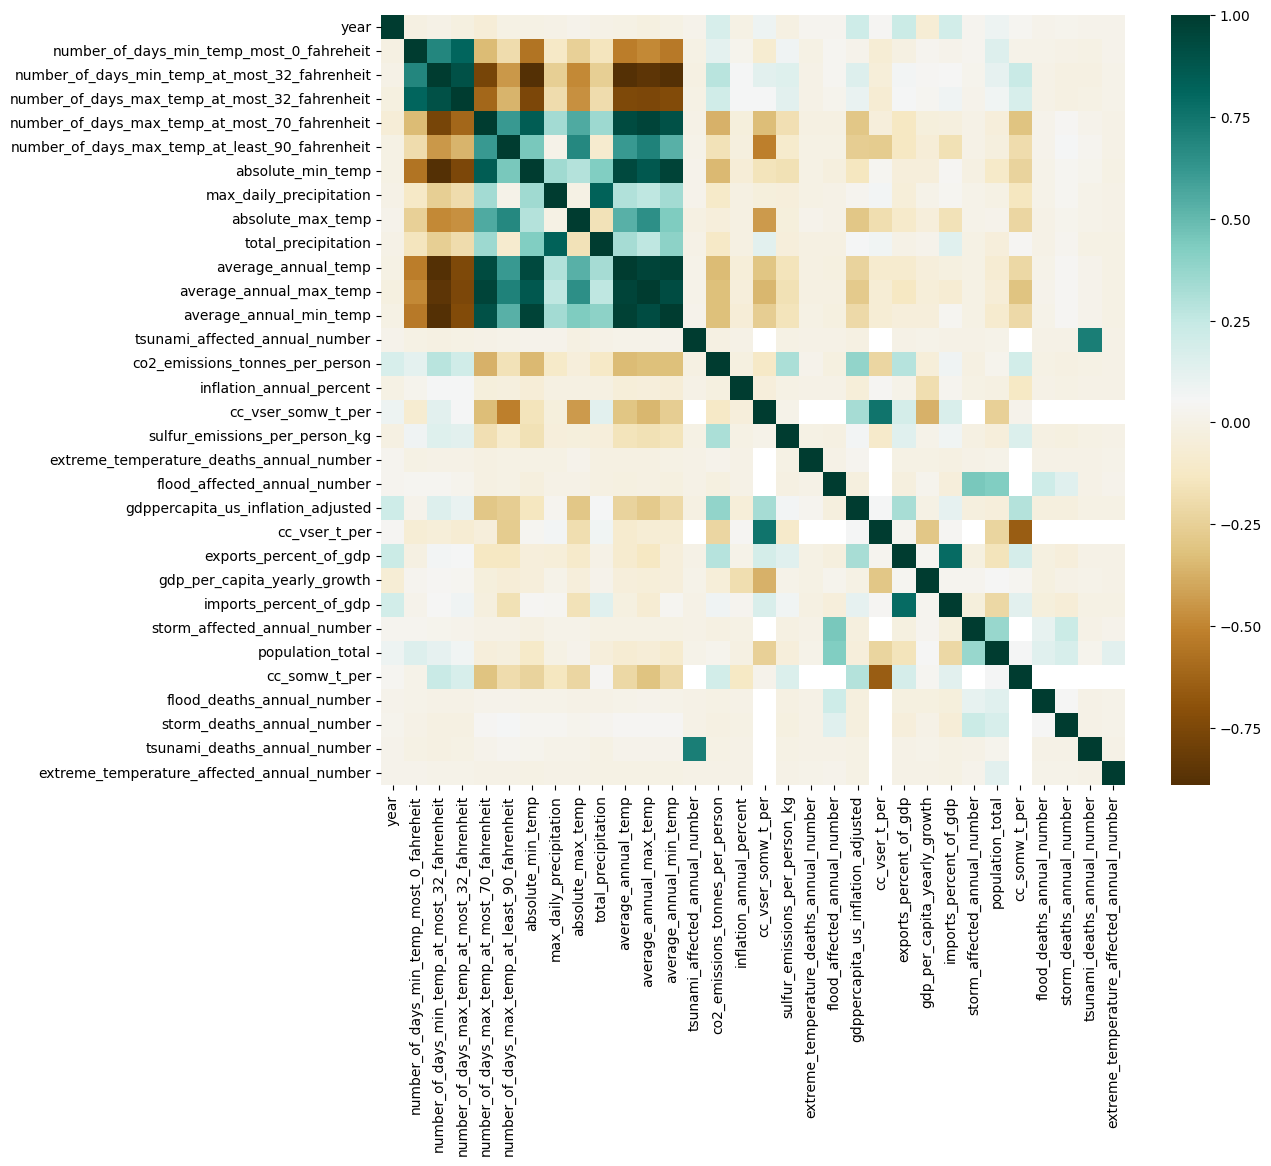

In [21]:
plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), cmap="BrBG")
plt.show()

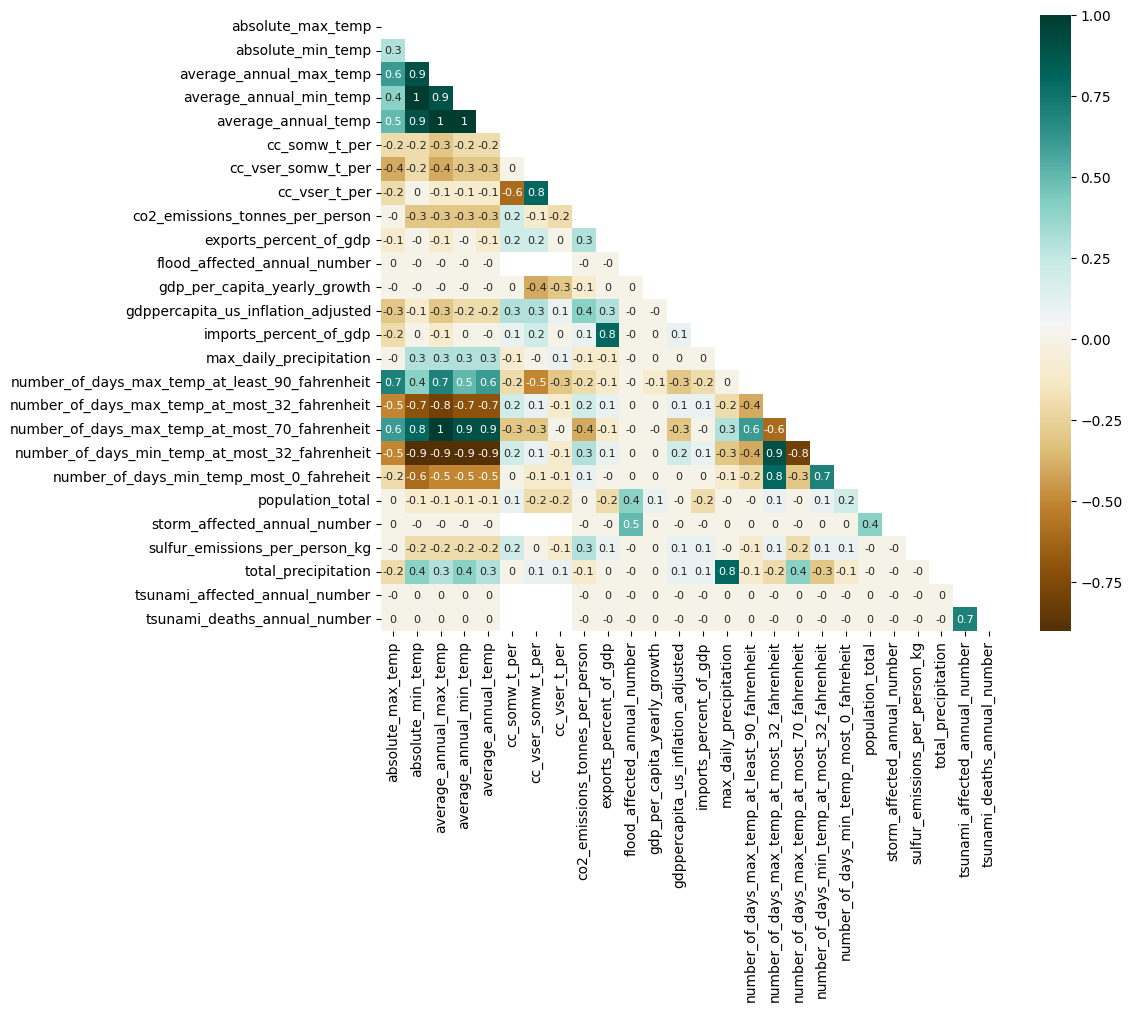

In [22]:
def absHighPass(df, absThresh):
    passed = set()
    for (r, c) in combinations(df.columns, 2):
        if abs(df.loc[r, c]) >= absThresh:
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed, passed]


plt.figure(figsize=(10, 8))

highpass_corr = absHighPass(df.corr(numeric_only=True), 0.3).round(1)

mask = np.triu(np.ones_like(highpass_corr, dtype=bool))


sns.heatmap(highpass_corr, cmap="BrBG", annot=True, annot_kws={"size": 8}, mask=mask);

# 5. Variables per country

## 5.1 Enviromental variables

### 5.1.1 CO2 emission per person in 2020

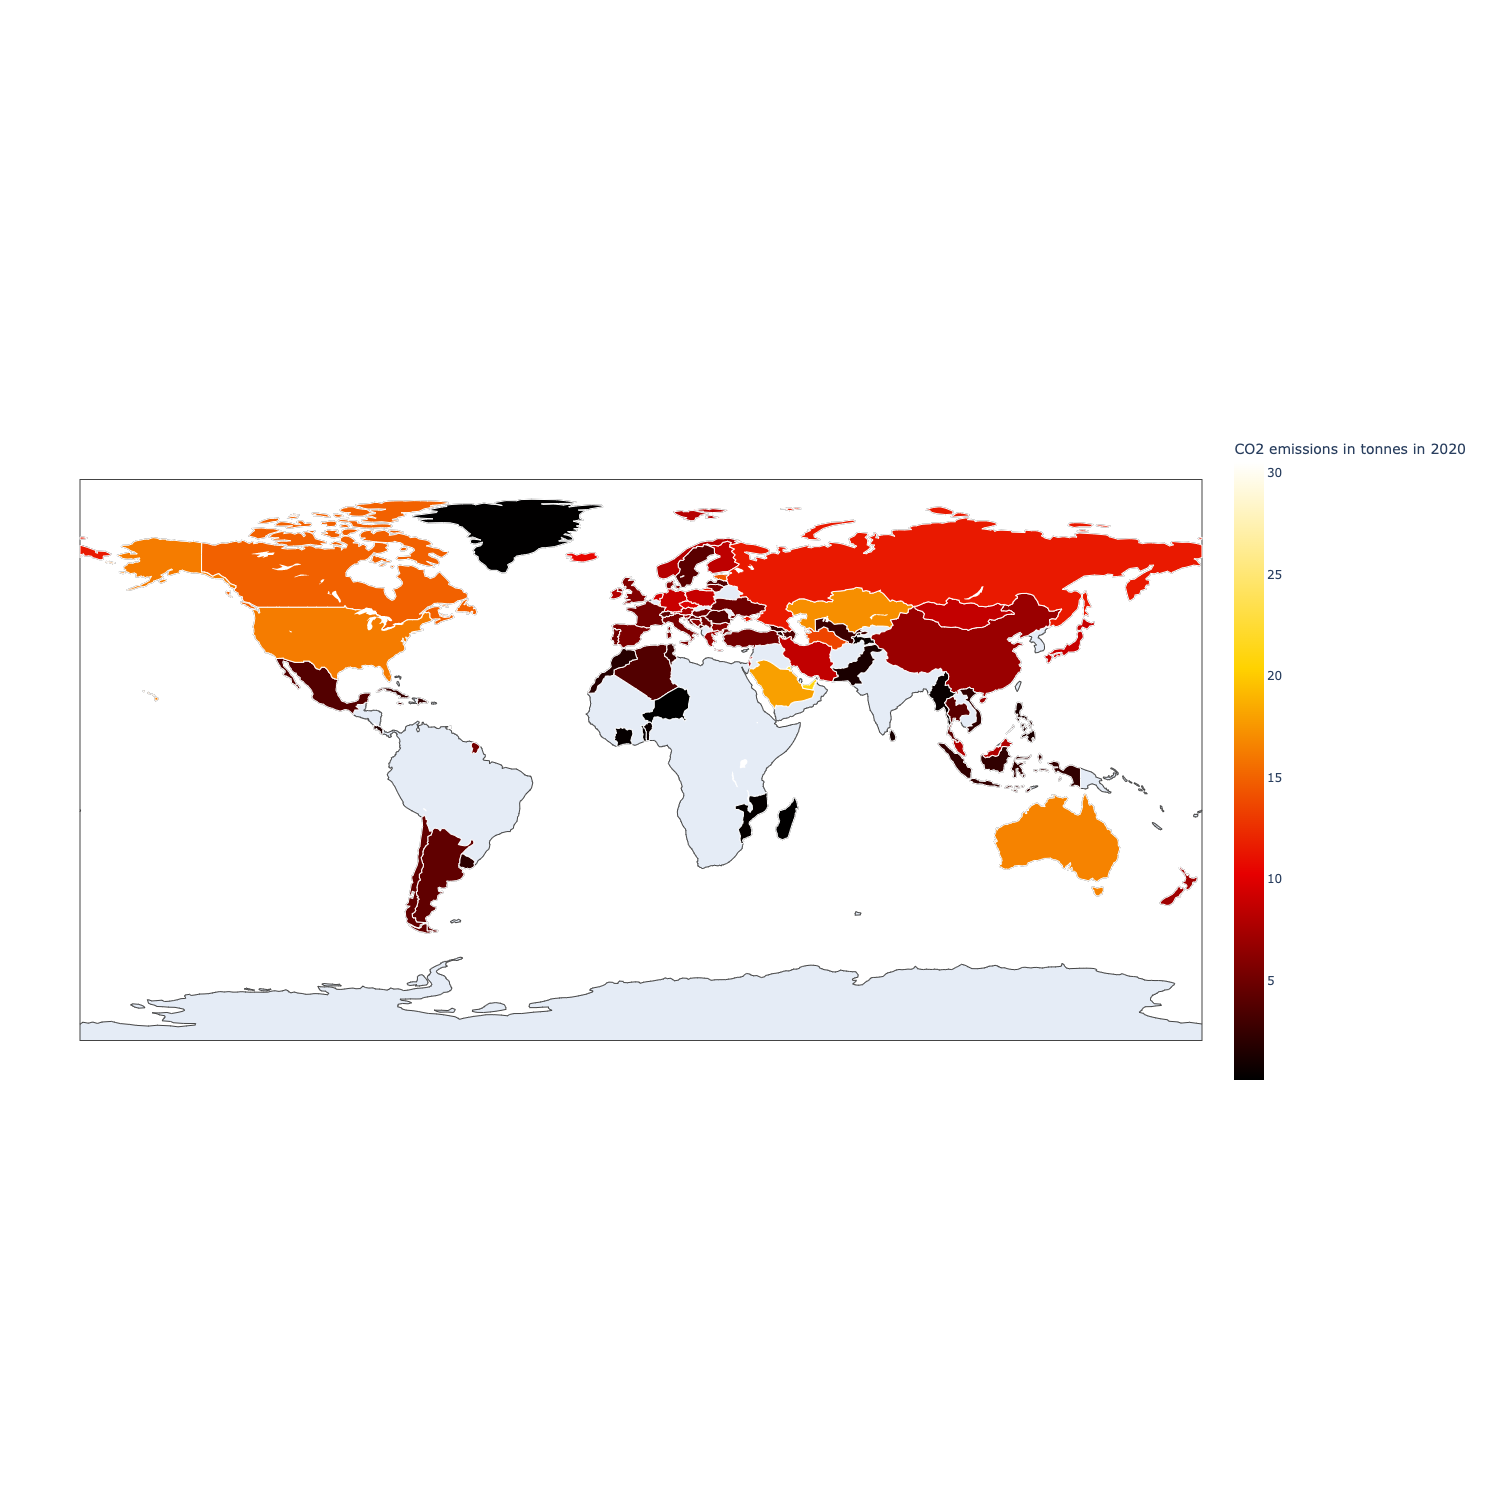

In [29]:
df_2020 = df.query("year==2020")

choropleth_map = go.Figure(
    data={
        "type": "choropleth",
        "locations": df_2020["country"],
        "locationmode": "country names",
        "colorscale": "Hot",
        "z": df_2020["co2_emissions_tonnes_per_person"],
        "colorbar": {"title": "CO2 emissions in tonnes in 2020", "len": 0.5},
        "marker": {"line": {"color": "rgb(255,255,255)", "width": 1}},
    },
    layout={"width": 1500, "height": 1500, "geo": {"scope": "world",}},
)
choropleth_map

## 5.2 Economical variables

### 5.2.1 GDP per capita

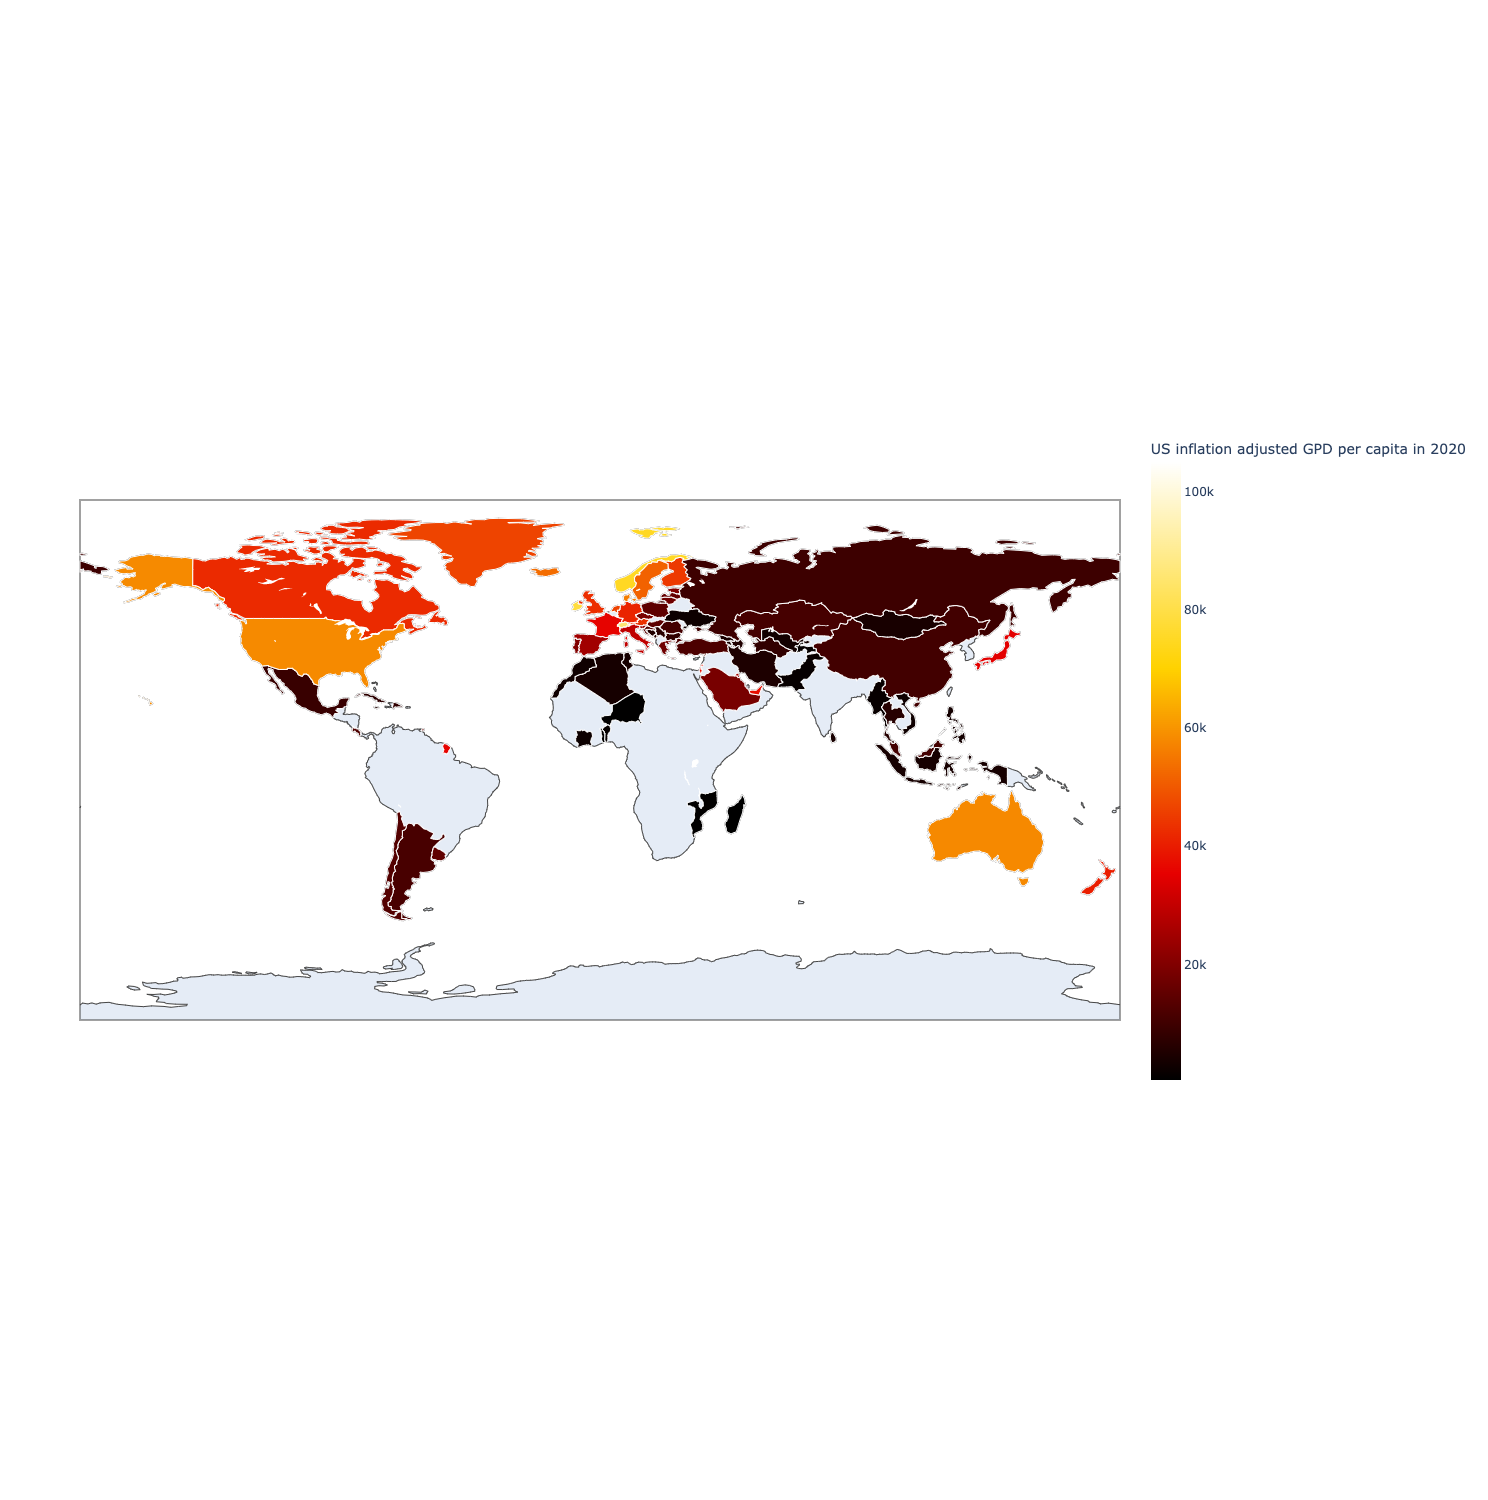

In [31]:
choropleth_map = go.Figure(
    data={
        "type": "choropleth",
        "locations": df_2020["country"],
        "locationmode": "country names",
        "colorscale": "Hot",
        "z": df_2020["gdppercapita_us_inflation_adjusted"],
        "colorbar": {"title": "US inflation adjusted GPD per capita in 2020", "len": 0.5},
        "marker": {"line": {"color": "rgb(255,255,255)", "width": 1}},
    },
    layout={"width": 1500, "height": 1500, "geo": {"scope": "world",}},
)
choropleth_map